In [1]:
from util import ProcessSignal
import os
import numpy as np
import scipy.signal as sgn

27240 27240
6810 6810


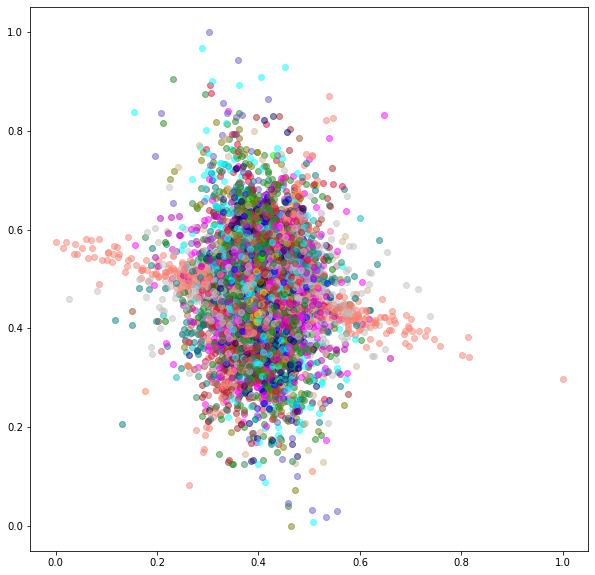

In [1]:
import h5py
import numpy as np
import torch
from Tsne import DecAndPlot
with h5py.File('origindata64x64.h5','r') as f:
    X_train = np.array(f['X_train'][:])
    y_train = np.array(f['y_train'][:])
    X_test = np.array(f['X_test'][:])
    y_test = np.array(f['y_test'][:])
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
DecAndPlot(X_train,y_train)

In [3]:
data = []
emitter = []
fs = 186666677
for root,dirs,file in os.walk('./'):
    if(root=='./'):
        continue
    for f in file:
        
        if f[-4:] =='.dat':
            emitter.append(f.split('_')[-2])
            sig = np.memmap(root+'/'+f,dtype='int16',mode='r')
            data.append(ProcessSignal(sig,fs))

emset = list(set(emitter))
a = [i for i in range(len(emset))]
emi = dict(zip(emset,a))
target = [emi[i] for i in emitter]

class5 =[]
t5 = []
for i in range(len(data)):
    if target[i]<5:
        class5.append(data[i])
        t5.append(target[i])

In [5]:
from sklearn import manifold
import matplotlib.pyplot as plt
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(data)

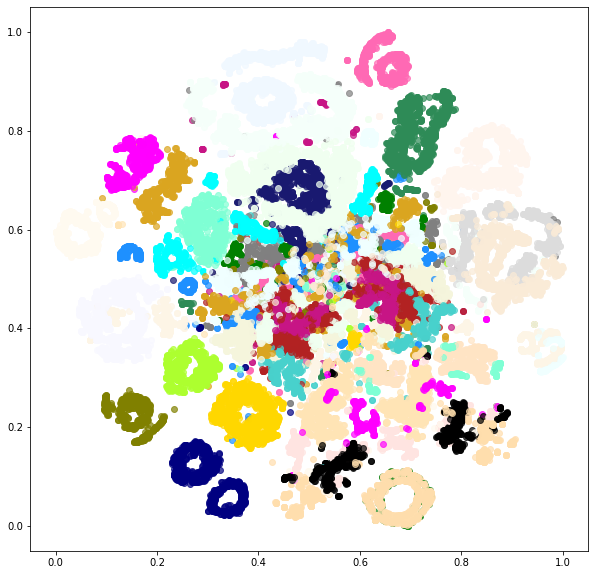

<Figure size 432x288 with 0 Axes>

In [6]:
x_min, x_max = X_tsne.min(0) , X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)

plt.figure(figsize=(10,10))

color = ['aliceblue',
'antiquewhite',
'aqua',
'aquamarine',
'azure',
'beige',
'bisque',
'black',
'dodgerblue',
'firebrick',
'floralwhite',
'forestgreen',
'fuchsia',
'gainsboro',
'ghostwhite',
'gold',
'goldenrod',
'gray',
'green',
'greenyellow',
'honeydew',
'hotpink',
'mediumturquoise',
'mediumvioletred',
'midnightblue',
'mintcream',
'mistyrose',
'moccasin',
'navajowhite',
'navy',
'oldlace',
'olive',
'seagreen',
'seashell'
]
co = ['r','g','b','navy','gold']
for i in range(X_norm.shape[0]):
    plt.scatter(X_norm[i,0],X_norm[i,1],c = color[target[i]],alpha=0.7)

plt.xticks()
plt.yticks()
plt.show()
plt.savefig('tsne.png')

In [7]:
class10 =[]
class15 =[]
t10 = []
t15 = []
for i in range(len(data)):
    if target[i]<10:
        class10.append(data[i])
        t10.append(target[i])
    if target[i]<15:
        class15.append(data[i])
        t15.append(target[i])

In [8]:
tsne10 = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne10 = tsne10.fit_transform(class10)


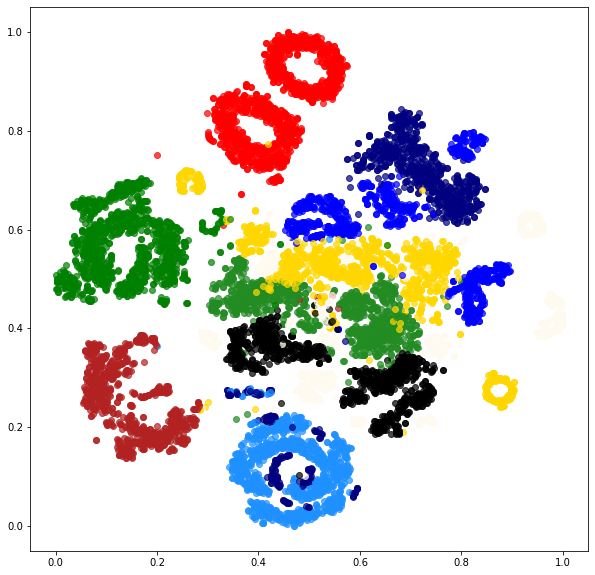

<Figure size 432x288 with 0 Axes>

In [9]:
x_min, x_max = X_tsne10.min(0) , X_tsne10.max(0)
X_norm = (X_tsne10 - x_min) / (x_max - x_min)

plt.figure(figsize=(10,10))

co10 = ['r','g','b','navy','gold','black',
'dodgerblue',
'firebrick',
'floralwhite',
'forestgreen']
for i in range(X_norm.shape[0]):
    plt.scatter(X_norm[i,0],X_norm[i,1],c = co10[t10[i]],alpha=0.7)

plt.xticks()
plt.yticks()
plt.show()
plt.savefig('tsne.png')

In [10]:
tsne15 = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne15 = tsne15.fit_transform(class15)

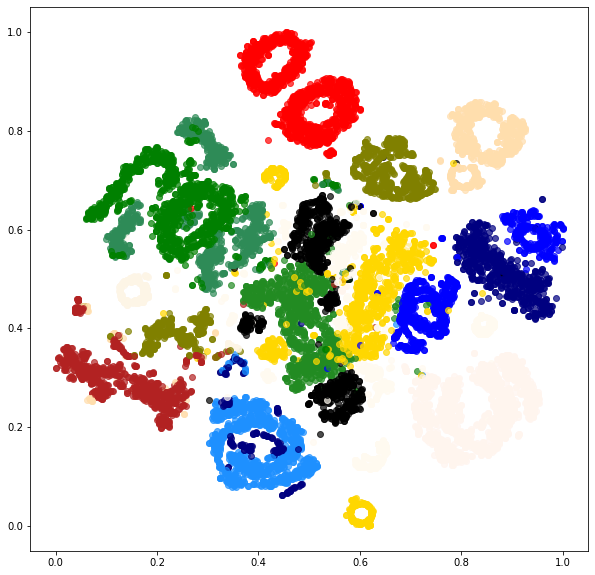

In [11]:
x_min, x_max = X_tsne15.min(0) , X_tsne15.max(0)
X_norm = (X_tsne15 - x_min) / (x_max - x_min)

plt.figure(figsize=(10,10))

co15 = ['r','g','b','navy','gold','black',
'dodgerblue',
'firebrick',
'floralwhite',
'forestgreen',
'navajowhite',
'oldlace',
'olive',
'seagreen',
'seashell']
for i in range(X_norm.shape[0]):
    plt.scatter(X_norm[i,0],X_norm[i,1],c = co15[t15[i]],alpha=0.7)

plt.xticks()
plt.yticks()
plt.show()

In [17]:
from Tsne import *

C10mid = []
T10mid = []
C10tail = []
T10tail = []
for i in range(len(data)):
    if 10<=target[i]<20:
        C10mid.append(data[i])
        T10mid.append(target[i]-10)
    if 20<=target[i]<30:
        C10tail.append(data[i])
        T10tail.append(target[i]-20)


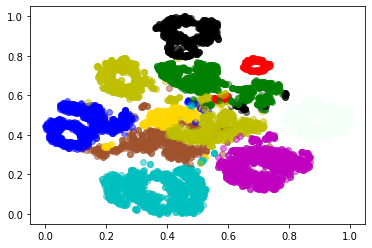

In [18]:
DecAndPlot(C10mid,T10mid)

In [19]:
DecAndPlot(C10tail,T10tail)

In [ ]:

C20 = []
T20 = []
for i in range(len(data)):
    if target[i]<20:
        C20.append(data[i])
        T20.append(target[i])
DecAndPlot(C20,T20)